In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
car=pd.read_csv('quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## cleaning-----



# = year has many non year vlues
# = yera object to int
# =price object to int
# =kms object to int
# =kms with integer
# = kms has nan value
# = keep first three words of name 




In [7]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

### copy of data


In [8]:
copy=car.copy()

In [9]:
car=car[car['year'].str.isnumeric()]

In [10]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [11]:
car['year']=car['year'].astype(int)

In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [13]:
# removing commas in car price


In [14]:
car=car[car['Price']!='Ask For Price']

In [15]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    object
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(1), object(5)
memory usage: 41.6+ KB


In [16]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [17]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [18]:
#  kms driven has with integer
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [19]:
car=car[car['kms_driven'].str.isnumeric()]

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.3+ KB


In [21]:
car['kms_driven']=car['kms_driven'].astype(int)

In [22]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [23]:
#  removing null value in fuel type 
car[car['fuel_type'].isnull()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [24]:
car=car[~car['fuel_type'].isna()]

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [26]:
car['name'].str.split(' ').str.slice(0,3).str.join(' ')

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [27]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [28]:
#  have to reset the index
car=car.reset_index(drop=True)

In [29]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [30]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [31]:
car=car[car['Price']<6e6].reset_index(drop=True)

In [32]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [33]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,815,815,815.000000,8.150000e+02,815.000000,815
unique,463,25,NaN,NaN,NaN,3
top,Honda City,Maruti,NaN,NaN,NaN,Petrol
freq,13,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.442945,4.017933e+05,46277.096933,NaN
std,NaN,NaN,4.005079,3.815888e+05,34318.459638,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.900000e+05,56879.000000,NaN


In [34]:
# 
car=car[car['Price']<6000000]

In [35]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [36]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [37]:
import seaborn as sns

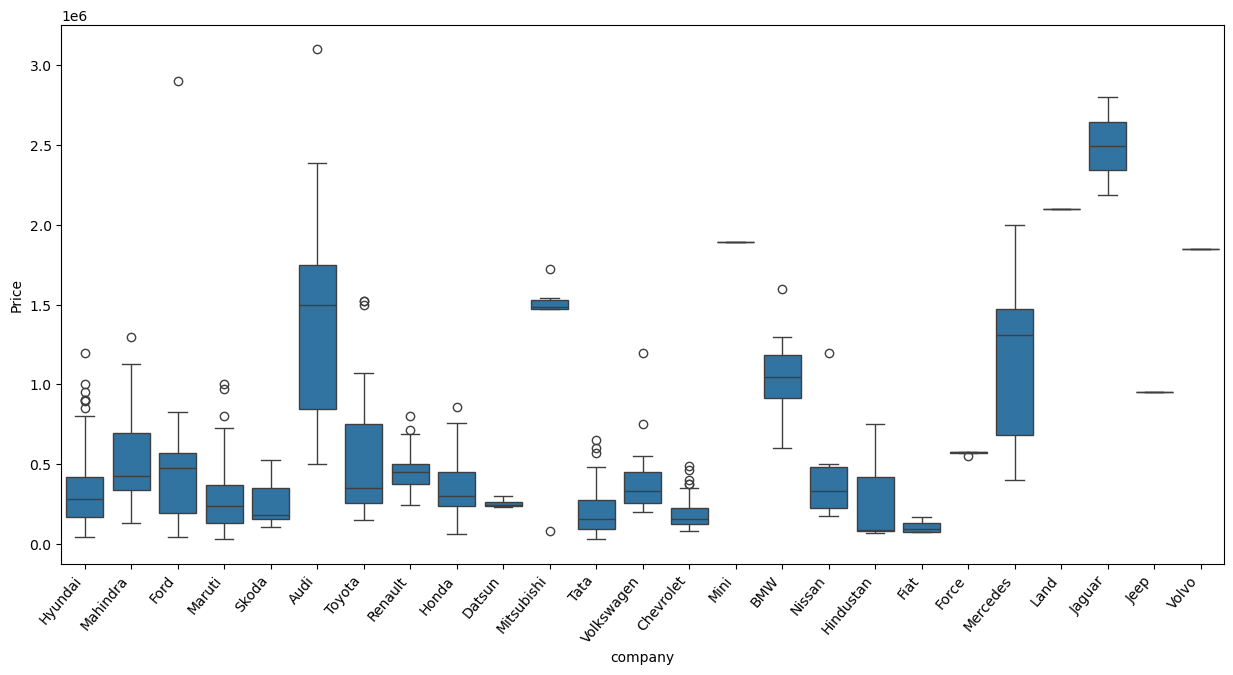

In [38]:
# ploting a boxpolt

plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right')
plt.show()

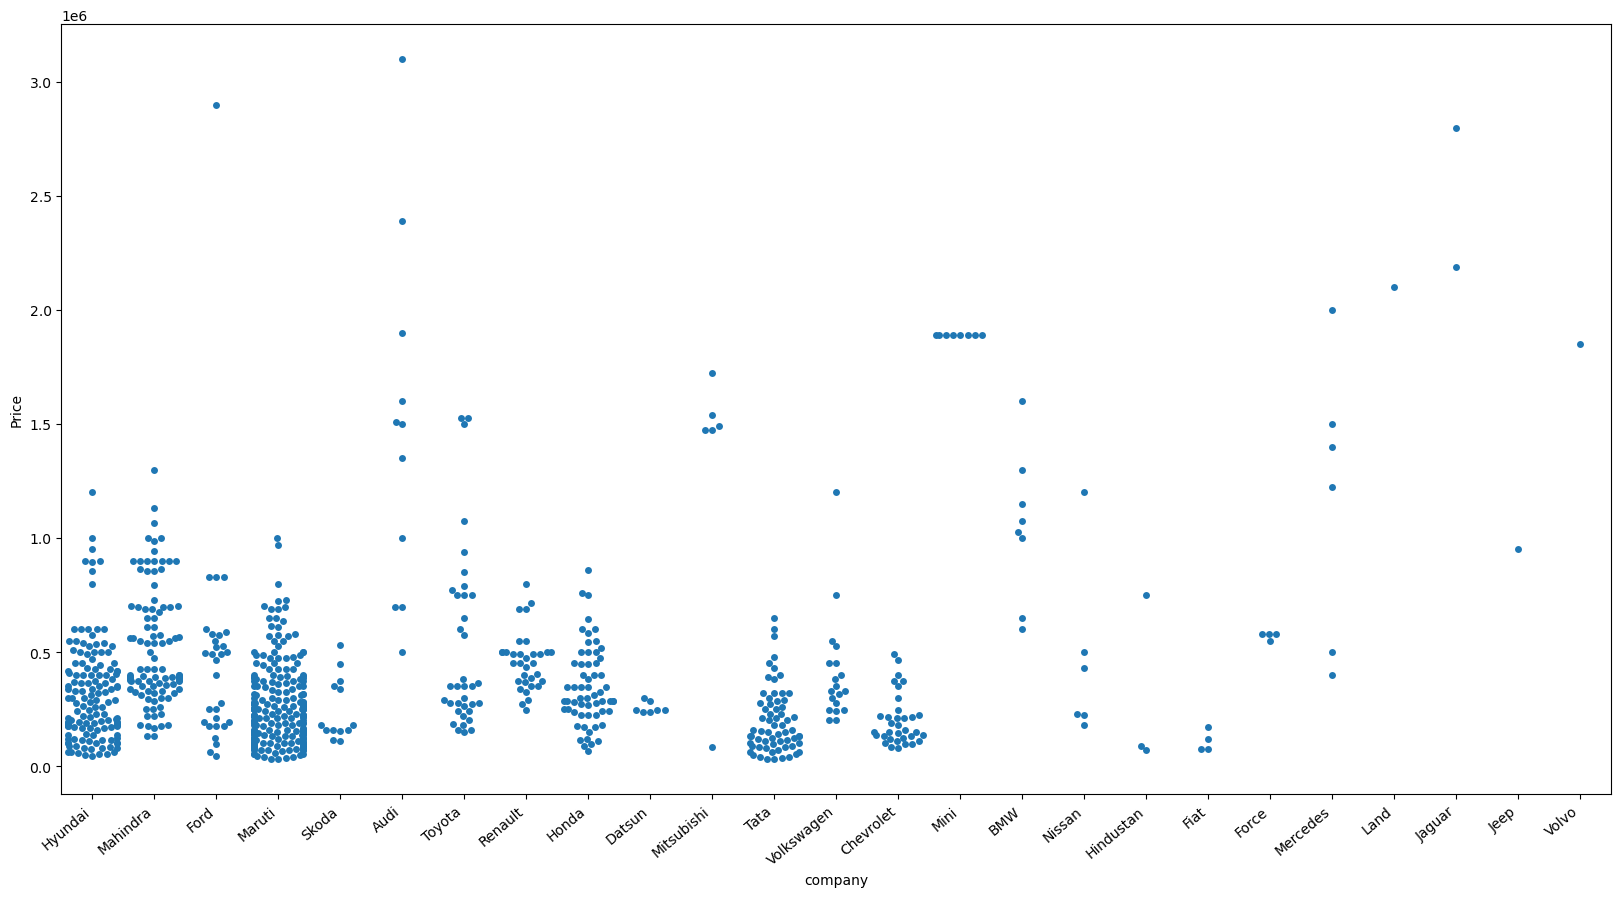

In [39]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

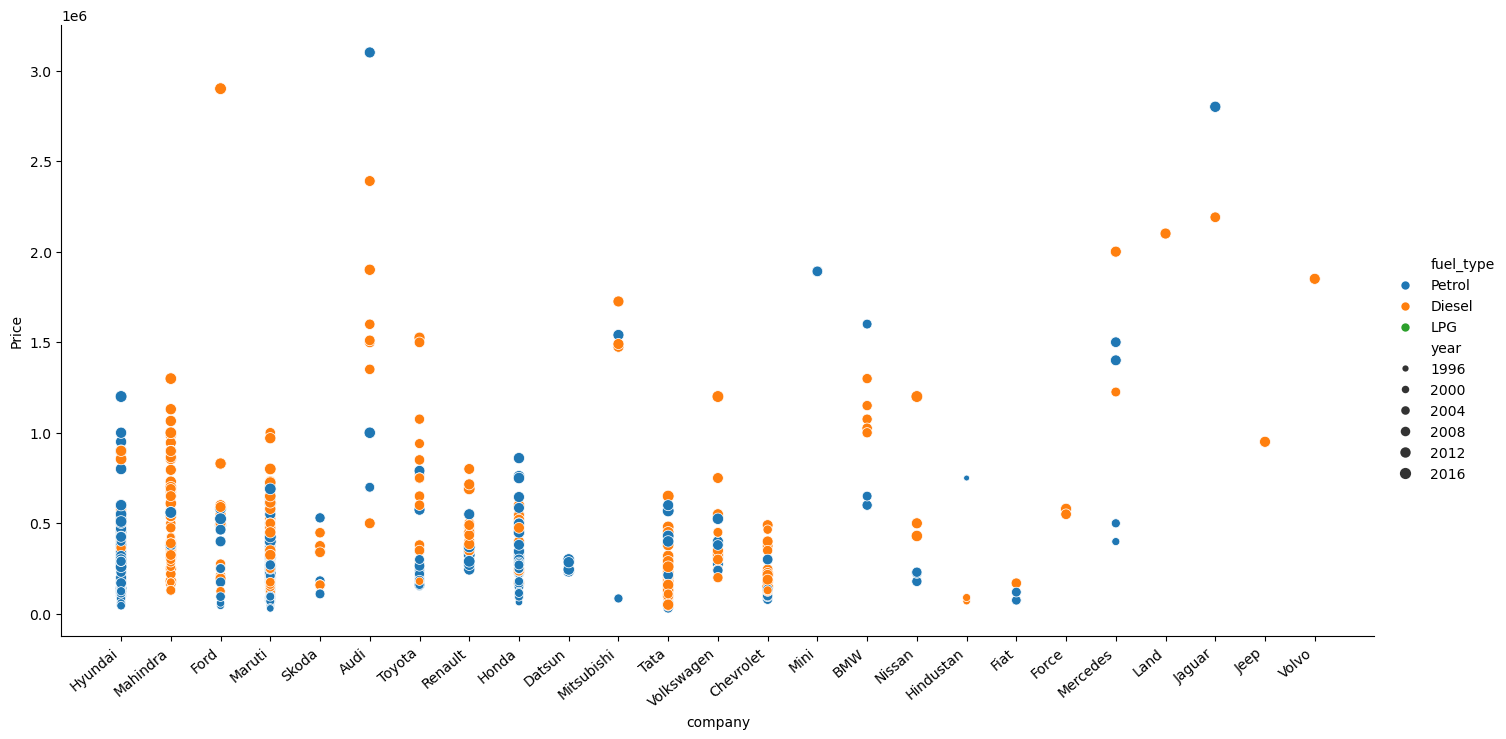

In [40]:
# Relationship of Price with FuelType, Year and Company mixed

ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [41]:
#  extracating the training data
x=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [42]:
x.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [43]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int32

In [44]:
#  applying train,test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [45]:
#  importing the libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [46]:
#  onehot encoding  on x (categorical values)
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

## Creating a column transformer to transform categorical columns

In [47]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [48]:
# linear regretion model 
lr=LinearRegression()

In [49]:
# making pipe line for future depolyment purpose
pipe=make_pipeline(column_trans,lr)

In [50]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0 TDI quattro Premium Plus', 'Audi Q7',
       'BMW 3 Series 320d...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [51]:
# the predicted value
y_pred=pipe.predict(x_test)

In [52]:
y_pred

array([ 279928.10701692, -265468.65775546,  280609.66430383,
        262085.1294037 ,  317554.20267231,  417903.93662119,
        233397.45796449,   98214.04932665,   96130.61952547,
        245960.73955817,  -73276.46715372,  570404.51940495,
        412161.27306359,  453241.24288317,  315569.78180241,
        476224.86569829,  449846.46853971,  263152.02821372,
        376205.07796525,  276287.16267052,  -30733.10042786,
        212291.24518231,  255348.52848384,  525722.97735687,
        333812.28244537,  204402.54482892,  262514.08608501,
        209817.68959879,  187130.45474437,  330927.76548722,
        499954.29963061,  435348.21950909,  538028.17318548,
       1436218.21637353,  240390.85881938,  308812.18336838,
        156363.17161926,  532713.72125229,  203646.62483166,
        665740.77464663,  252984.21787581,  484941.40120617,
        532363.96451057,  576214.54934599,  650889.86728013,
        419693.89766391,  400560.53595874,  516400.52648129,
        352837.93694391,

In [53]:
y_pred=pipe.predict(x_test)

In [54]:
r2_score(y_test,y_pred)

0.6434992430067454

### Finding the model with a random state of TrainTestSplit


In [59]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [61]:
np.argmax(scores)

636

In [62]:
scores[np.argmax(scores)]

0.8656111795393883

In [88]:
from sklearn .linear_model import Ridge,Lasso,ElasticNet


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0 TDI quattro Premium Plus', 'Audi Q7',
       'BMW 3 Series 320d...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('ridge', Ridge(alpha=0.1))])

In [78]:

scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    ri =Ridge(alpha=0.1)
    pipe=make_pipeline(column_trans,ri)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [79]:
np.argmax(scores)

395

In [80]:
# very love accuracy we cant use ridge
scores[np.argmax(scores)]

0.2919624564472669

In [91]:
la =Lasso(alpha=0.1)
pipe=make_pipeline(column_trans,ri)
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0 TDI quattro Premium Plus', 'Audi Q7',
       'BMW 3 Series 320d...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('ridge', Ridge(alpha=0.1))])

In [85]:

scores=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    la =Lasso(alpha=0.1)
    pipe=make_pipeline(column_trans,la)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))


In [86]:
np.argmax(scores)


4

In [87]:
scores[np.argmax(scores)]

0.8461265135402842